# Pokemon:Data Analysis 

Here we are going to perform a data analysis on pokemon stats. The dataset has been downloaded from kaggle.
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.
In this project we will have a comparative analysis like finding number of pokemons of each type, comparing stats of different types and many more.  

## Downloading the Dataset

In [56]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [57]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/abcsds/pokemon' 

In [58]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./pokemon" (use force=True to force download)


The dataset has been downloaded and extracted.

In [59]:
data_dir = './pokemon'

In [60]:
import os
os.listdir(data_dir)

['Pokemon.csv']

Let us save and upload our work to Jovian before continuing.

In [61]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [62]:
!pip install jovian --upgrade -q

In [63]:
import jovian

In [64]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rimo10/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rimo10/zerotopandas-course-project-starter


'https://jovian.ai/rimo10/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

Data Cleaning means the process of identifying the incorrect, incomplete, inaccurate, irrelevant or missing part of the data and then modifying, replacing or deleting them according to the necessity. With missing stats it might be difficult to draw proper conclusions



In [65]:
import pandas as pd
import numpy as np

In [66]:
pokemon_df=pd.read_csv(data_dir+'/Pokemon.csv')
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [67]:
pokemon_df=pokemon_df.drop("#",axis=1)

In [68]:
pokemon_df.nunique()

Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [69]:
pokemon_df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

We have 386 missing data in Type2 column. They need to be dealt first before performing analysis 

Because Type 2 represents secondary types of Pokemons, with many Pokemons only being assigned a primary type (Type 1), this value cannot be imputed. A Pokemon's secondary type (if any) is an important attribute for the Pokemon's moves, and thus should not be removed.

In [70]:
pokemon_df['Type 2']=pokemon_df['Type 2'].replace(np.nan,'Nill')

In [71]:
pokemon_df.isna().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [72]:
pokemon_df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rimo10/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rimo10/zerotopandas-course-project-starter


'https://jovian.ai/rimo10/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

Let's visualize some of the important Pokemon stats 


In [75]:
pokemon_df.groupby('Type 1').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [76]:
pokemon_df.groupby("Type 2").mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,
Bug,393.333333,53.333333,90.000000,80.000000,46.666667,61.666667,61.666667,3.333333,0.000000
Dark,484.400000,75.550000,109.800000,72.050000,81.800000,69.850000,75.350000,3.750000,0.050000
Dragon,526.166667,82.166667,94.444444,87.055556,98.500000,83.444444,80.555556,4.166667,0.222222
Electric,455.333333,88.166667,72.666667,68.333333,81.166667,73.500000,71.500000,4.000000,0.166667
Fairy,417.956522,64.304348,61.608696,73.869565,75.000000,81.956522,61.217391,3.565217,0.086957
Fighting,525.846154,79.461538,112.846154,82.500000,81.269231,82.384615,87.384615,3.923077,0.153846
Fire,506.250000,71.250000,81.250000,80.166667,110.416667,83.500000,79.666667,4.000000,0.250000
Flying,452.546392,71.391753,80.288660,68.309278,75.628866,71.206186,85.721649,3.072165,0.134021
Ghost,430.714286,59.142857,84.142857,82.285714,73.214286,78.071429,53.857143,4.785714,0.071429


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [77]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [78]:
type1=pokemon_df['Type 1'].unique()
type1

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [79]:
Type1_counts=pokemon_df.groupby('Type 1').count()
Type1_counts =Type1_counts['Name']
Type1_counts


#Using .count() function we can find how many of each type are there.

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Name, dtype: int64

#### Let's view the same on barplot

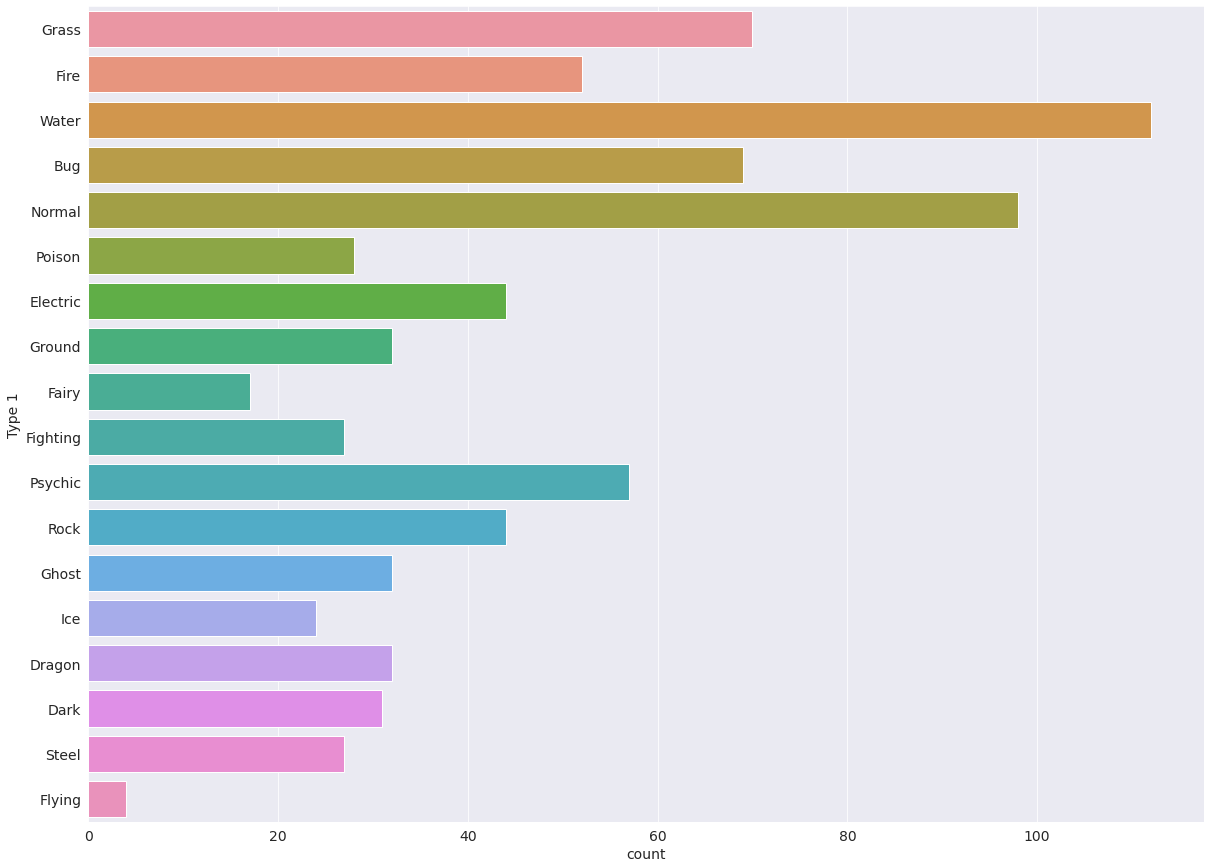

In [80]:
plt.figure(figsize=(20,15))
sns.countplot(data=pokemon_df,y='Type 1');

#### Which Type1 Pokemon is highest in population?
From the above plot it's clearly evident that `Water Type` Pokemon is mostly found, whereas `Flying Type` Pokemon are rarely avialabe

In [81]:
type2=type1=pokemon_df['Type 1'].unique()
type2

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [82]:
Type2_counts=pokemon_df.groupby('Type 2').count()
Type2_counts =Type2_counts['Name']
Type2_counts

Type 2
Bug           3
Dark         20
Dragon       18
Electric      6
Fairy        23
Fighting     26
Fire         12
Flying       97
Ghost        14
Grass        25
Ground       35
Ice          14
Nill        386
Normal        4
Poison       34
Psychic      33
Rock         14
Steel        22
Water        14
Name: Name, dtype: int64

#### Let's view the same on barplot

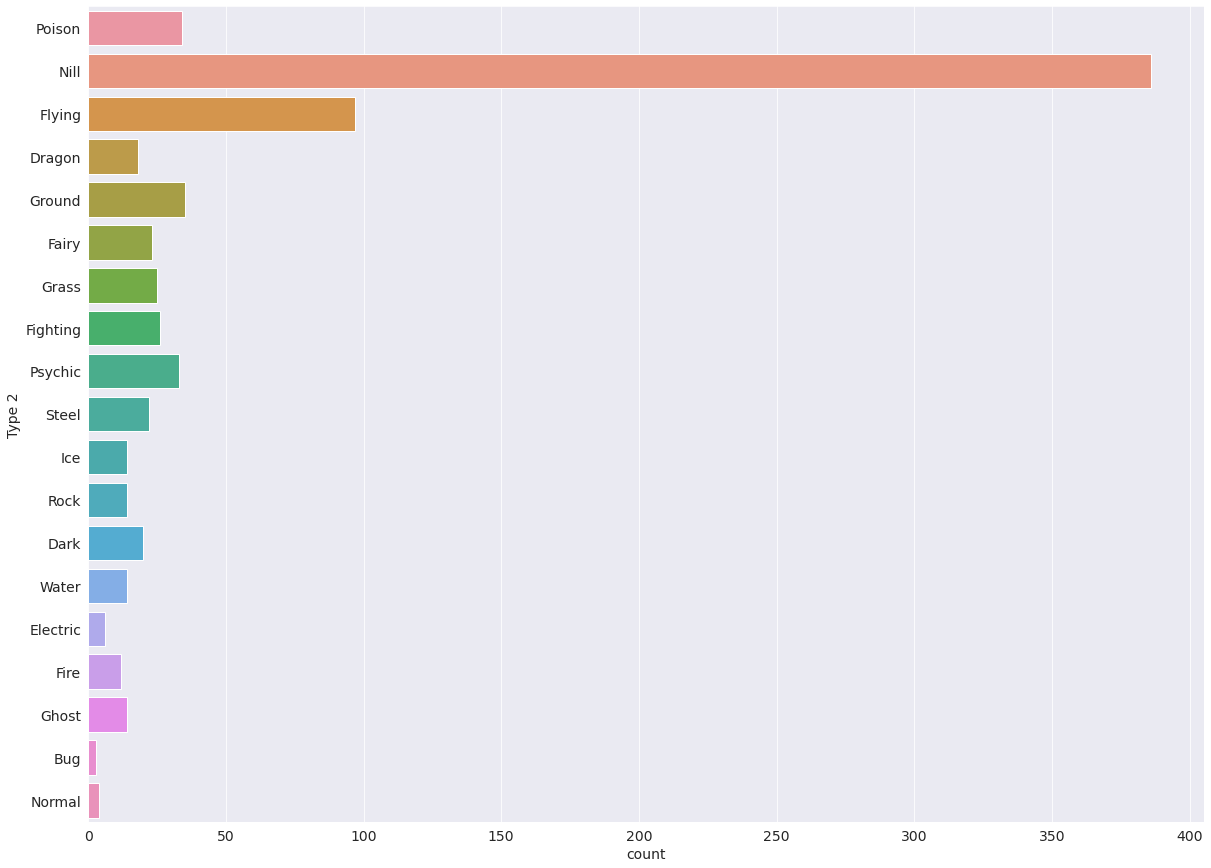

In [83]:
plt.figure(figsize=(20,15))
sns.countplot(data=pokemon_df,y='Type 2');

#### What can you say about the population of Type2 Pokemons?

Type2 Pokemon of `Flying` type is mostly found 

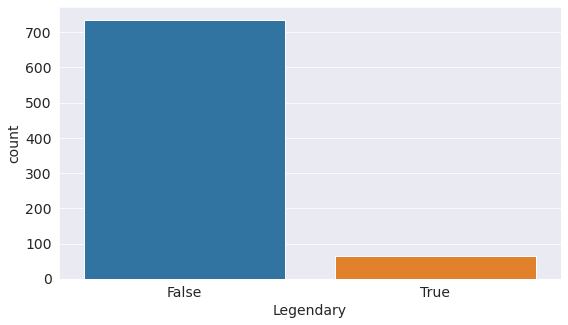

In [84]:
sns.countplot(data=pokemon_df,x='Legendary');

The population of Legendary Pokemons is fewer

In [85]:
type1_gen=pokemon_df.groupby(['Type 1','Generation']).count()
type1_gen['Name']

Type 1  Generation
Bug     1             14
        2             12
        3             12
        4             10
        5             18
                      ..
Water   2             18
        3             27
        4             13
        5             18
        6              5
Name: Name, Length: 98, dtype: int64

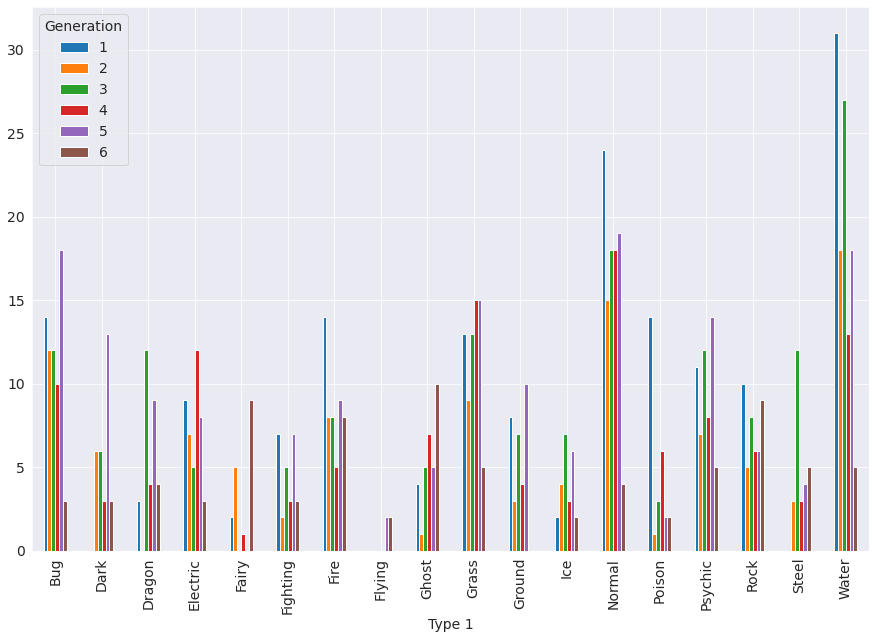

In [86]:
pd.crosstab(pokemon_df['Type 1'],pokemon_df['Generation']).plot.bar(figsize=(15,10));

#### List 2 inferences that you draw from the above plot?

* Many Pokemons have a missing generation, for eg, `Flying` Type pokemons starts directly from Generation 5 
* `Ghost` Type pokemons have maximum population of Generation 6 Pokemons

In [87]:
type2_gen=pokemon_df.groupby(['Type 2','Generation']).count()
type2_gen['Name']

Type 2  Generation
Bug     3             2
        4             1
Dark    1             1
        2             2
        3             7
                     ..
Steel   5             8
Water   1             4
        3             4
        4             2
        6             4
Name: Name, Length: 90, dtype: int64

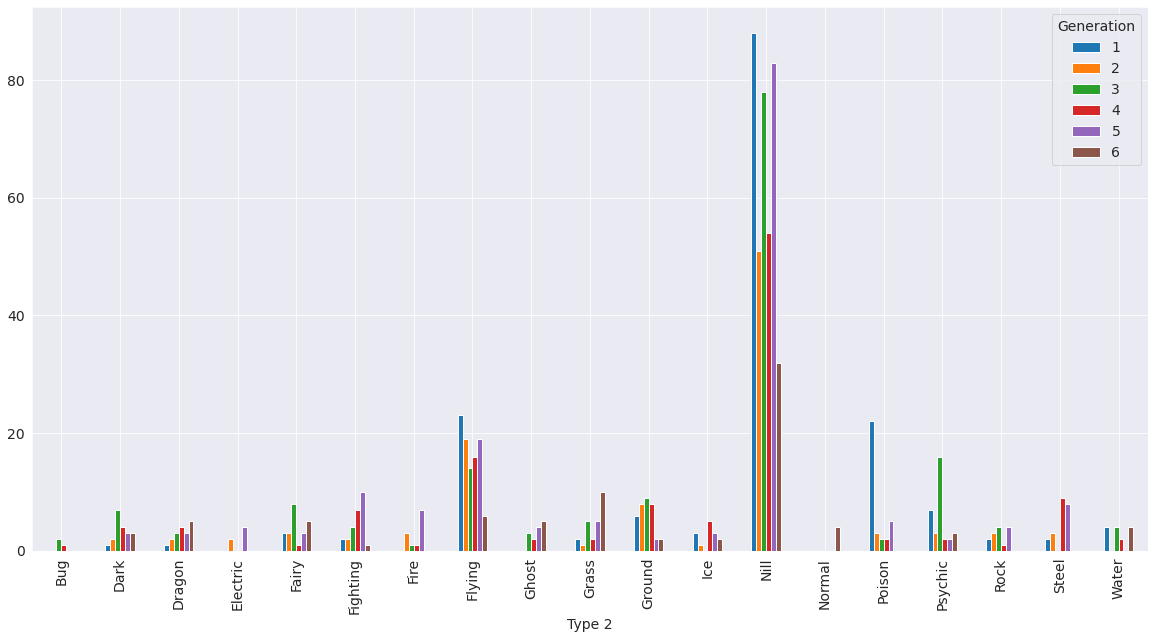

In [88]:
pd.crosstab(pokemon_df['Type 2'],pokemon_df['Generation']).plot.bar(figsize=(20,10));

### Find max pokemon type from each generation. 
* Generation1-Flying
* Generation2-Flying
* Generation3-Psychic
* Generation4-Flying
* Generation5-Flying
* Generation6-Grass

Let us save and upload our work to Jovian before continuing

In [89]:
import jovian

In [90]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rimo10/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rimo10/zerotopandas-course-project-starter


'https://jovian.ai/rimo10/zerotopandas-course-project-starter'

## Asking and Answering Questions




#### Q1: Which Generation pokemons have the maximum population?

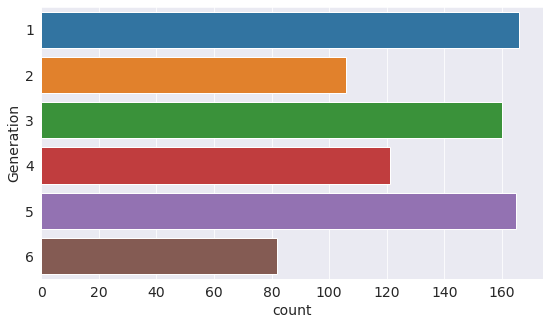

In [91]:
sns.countplot(data=pokemon_df,y='Generation');

Generation 1 Pokemons have the highest population

Here we are using `countplot` function of seaborn library to count the total number of pokemons of each generation Type

#### Q2: Which Type1 pokemons have the maximum  and minimum legendary pokemons ?

Here we will be using `pd.crosstab` as we will be performing cross tabulation of two factors

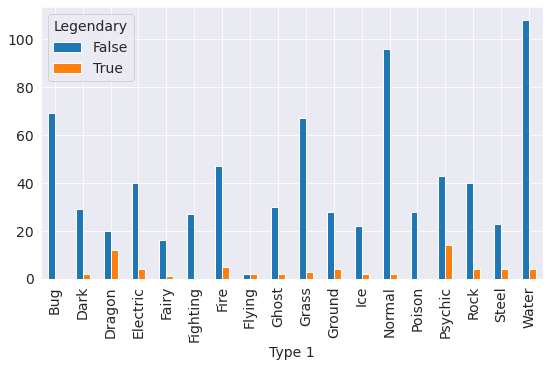

In [92]:
pd.crosstab(pokemon_df['Type 1'],pokemon_df['Legendary']).plot.bar();

`Psychic` type Pokemons have the most Legendary Pokemons , followed by `Dragons`. `Bug` Type do not have Legendary type Pokemons at all .


#### Q3: Plot number of legendary Type2 Pokemons. What can you refer from the plot.

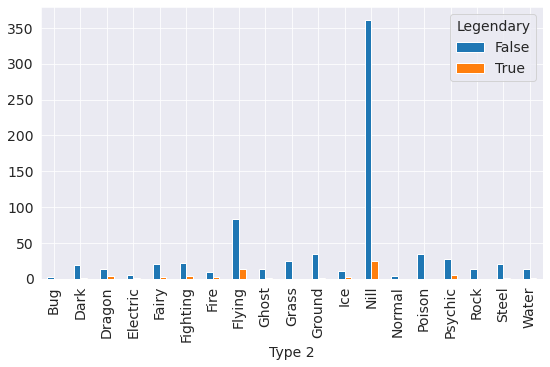

In [93]:
pd.crosstab(pokemon_df['Type 2'],pokemon_df['Legendary']).plot.bar();

Flying,Psychic,Dragon and few others are having Legendary Pokemon. Rest do not Have 

#### Q4: Which Type of pokemon has maximum and minimum among attack and defence? Consider Type1 only

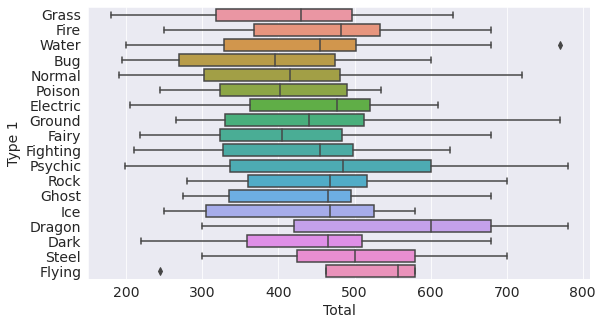

In [94]:
sns.boxplot(data=pokemon_df,x='Total',y='Type 1');

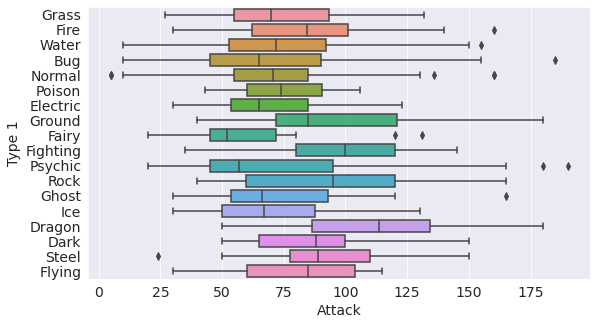

In [95]:
sns.boxplot(data=pokemon_df,x='Attack',y='Type 1');

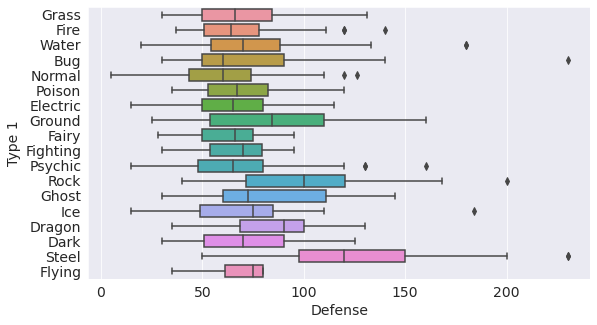

In [96]:
sns.boxplot(data=pokemon_df,x='Defense',y='Type 1');

* `Psychic` Type pokemon has maximum attack,followed by `Dragon` Type. `Normal` Type pokemon has minimum attack

* `Steel` type pokemon has maximum Defense followed by `Grass` type. `Normal` Type has minimum Defense.

#### Q5: Find pokemon with max and min stats from each of categories like attack,Defense etc

## Max

In [97]:
pokemon_df.loc[pokemon_df[["Total"]].idxmax()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [98]:
pokemon_df.loc[pokemon_df[["Attack"]].idxmax()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [99]:
pokemon_df.loc[pokemon_df[["Defense"]].idxmax()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False


In [100]:
pokemon_df.loc[pokemon_df[["Speed"]].idxmax()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,DeoxysSpeed Forme,Psychic,Nill,600,50,95,90,95,90,180,3,True


# Min

In [101]:
pokemon_df.loc[pokemon_df[["Total"]].idxmin()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,Sunkern,Grass,Nill,180,30,30,30,30,30,30,2,False


In [102]:
pokemon_df.loc[pokemon_df[["Attack"]].idxmin()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,Chansey,Normal,Nill,450,250,5,5,35,105,50,1,False


In [103]:
pokemon_df.loc[pokemon_df[["Defense"]].idxmin()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,Chansey,Normal,Nill,450,250,5,5,35,105,50,1,False


In [104]:
pokemon_df.loc[pokemon_df[["Speed"]].idxmin()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


Let us save and upload our work to Jovian before continuing.

In [105]:
import jovian

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rimo10/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rimo10/zerotopandas-course-project-starter


'https://jovian.ai/rimo10/zerotopandas-course-project-starter'

## Inferences and Conclusion

From the above analysis i made the following conclusions
* Psychic type pokemons are overall the most powefull. For eg. MewTwo
* On an average all Dragon type Pokemons have better stats.
* All Generation6 pokemons are legendary.
* On average, generation 4 seems to be the weakest and the second generation the strongest. But except for generation 4 all the others are pretty close to each other.

In [107]:
import jovian

In [108]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rimo10/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/rimo10/zerotopandas-course-project-starter


'https://jovian.ai/rimo10/zerotopandas-course-project-starter'

## References and Future Work
We can find many other things from this datset ,like sort pokemons according to their rank(based overall stats),compare stats between different type of pokemons, but that's it for now. 


To generate this Notebook the [Pandas documentation](https://pandas.pydata.org/docs/) and the [Seaborn documentation](https://seaborn.pydata.org/) were very helpful.

In [109]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>